In [1]:
import json
import numpy as np
import os
from numpy.linalg import norm
from tkinter import *
from tkinter import messagebox as mb
from DataProcess import Text_To_Speech, read_Questions_and_Choices
from playsound import playsound
from threading import Thread
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
from IRT import *
from GUI_Design import *
from utils import *
from Recommendation_Algorithms_Data_Generation import *


WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Open Json file and read data
with open('Data/data.json', 'r', encoding="utf-8") as handle:
    Data = json.load(handle)

# Check the one of data
testConversation = list(Data[10325].keys())[0]
print(testConversation)
testConversation = list(Data[10].values())[0]
print(testConversation)

os.environ["KMP_DUBLICATE_LIB_OK"] = "True"
# Delete 10325
# Delete 10386

# Important Variable`
User_log_summary_data = []

M: For years, many of us have relied on antibiotic use to treat various infections. And the reality is that antibiotics have been responsible for saving millions of lives since penicillin, one of the earliest antibiotics, was first used on a clinical basis 70 years ago. However, today is a new era in which taking antibiotics can cause some very dangerous and potentially life-threatening situations. With such a large life-threatening epidemic, it is sad to say that only 1. 2 percent of budgetary money for the National Institutes of Health is currently being spent on research to tackle this problem. This is a far cry from the funds necessary for a problem of such magnitude.
[{'What gesture do Bulgarians and Greeks use to express negative responses?': {"A. Nodding one's head***B. Waving one's hand***C. Holding up the forefinger. ***D. Turning the right thumb down.": 'A'}}, {'What is likely to offend Arab business people?': {"A. Looking away from them***B. Forming a circle with fingers***C

In [3]:
Initial_question = ["Is English your native language?", "How long have you been learning English?",
                    "How did you learn English?", "Have you ever taken an English proficiency test?", 
                    "How about the result?", "Which English proficiency level do you think you belong to?"]
Initial_choices = [['A. Yes', 'B. No'], 
                   ['A. No more than 3 years.', 'B. No more than 6 years.', 'C. No more than 9 years.', 'D. More than 9 years'], 
                   ['A. Learn it by internet source.', 'B. Teached by teacher.', 'C. Teached by Parents.', 'D.Not above'], 
                   ['A. Yes.', 'B. No'], 
                   ['A. Low level.', 'B. Medium Level.', 'C. High Level.', 'D. Professional Level.'], 
                   ['A. Low level.', 'B. Medium Level.', 'C. High Level.', 'D. Professional Level.']]

choices_weights = [[10,0],[1,3,5,7],[4,7,6,3],[3,0],[2,4,7,10],[2,3,4,5]]

Initial_Questionares = dict(zip(Initial_question, Initial_choices))
print(Initial_Questionares)

# with open('initial_questionnaire.json', 'w') as fp:
#     json.dump(Initial_Questionares, fp)
    
with open('initial_questionnaire.json', 'r') as fp:
    initial_questionnaire = json.load(fp)
print(initial_questionnaire)

{'Is English your native language?': ['A. Yes', 'B. No'], 'How long have you been learning English?': ['A. No more than 3 years.', 'B. No more than 6 years.', 'C. No more than 9 years.', 'D. More than 9 years'], 'How did you learn English?': ['A. Learn it by internet source.', 'B. Teached by teacher.', 'C. Teached by Parents.', 'D.Not above'], 'Have you ever taken an English proficiency test?': ['A. Yes.', 'B. No'], 'How about the result?': ['A. Low level.', 'B. Medium Level.', 'C. High Level.', 'D. Professional Level.'], 'Which English proficiency level do you think you belong to?': ['A. Low level.', 'B. Medium Level.', 'C. High Level.', 'D. Professional Level.']}
{'Is English your native language?': ['A. Yes', 'B. No'], 'How long have you been learning English?': ['A. No more than 3 years.', 'B. No more than 6 years.', 'C. No more than 9 years.', 'D. More than 9 years'], 'How did you learn English?': ['A. Learn it by internet source.', 'B. Teached by teacher.', 'C. Teached by Parents

In [4]:
# print(len(list(Data)))

In [5]:
questions = list(initial_questionnaire.keys())
choices = list(initial_questionnaire.values())
# print(questions)
# print(choices)

initialWindow = Tk()
initialWindow.geometry("800x500")
initialWindow.title("Listening Conorehension Quiz")

initial = Initial_Questionnaire(quizWindow=initialWindow, questions=questions, choices=choices)
userAnswer = initial.selectedAnswers
initialWindow.mainloop()
print("Users answers: ", userAnswer)

init_estimate_ability = compute_init_ability(userAnswer)
print("Initial estimate ability: ", init_estimate_ability)

# Record first value
User_log_summary_data.append(init_estimate_ability)
print(User_log_summary_data)

Users answers:  ['B', 'C', 'B', 'A', 'B', 'B']
Initial estimate ability:  3.1428571428571432
[3.1428571428571432]


In [6]:
# To read a Difficulty Materials and to read all difficulties of materials
# Each Material maybe contains mutil questions, I set all question difficulty same as materials difficulties.
matDiff = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_directely.csv")
print(len(np.array(list(matDiff["Materials Difficulty"])).shape))
quesDiff = getQuestionsDifficulty(dataf=Data, materialDifficultyLevelNor=list(matDiff["Materials Difficulty"]))
display(matDiff)
matDiff = list(matDiff["Materials Difficulty"])
print(matDiff)
print(quesDiff)

1


12447it [00:00, 886659.34it/s]


,Materials Difficulty
0,0.01
1,0.02
2,1.01
3,3.01
4,2.01
...,...
12442,0.49
12443,1.58
12444,0.50
12445,0.51


[0.01, 0.02, 1.01, 3.01, 2.01, 5.01, 0.03, 0.04, 0.05, 0.06, 4.01, 5.02, 2.02, 0.07, 0.08, 0.09, 3.02, 1.02, 1.03, 0.0999999999999999, 2.03, 1.04, 0.1099999999999999, 0.1199999999999999, 3.03, 1.05, 1.06, 3.04, 4.02, 0.1299999999999999, 0.1399999999999999, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 5.03, 4.03, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 1.07, 0.2700000000000001, 1.08, 1.09, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 4.04, 1.1, 0.3100000000000001, 0.3200000000000001, 1.11, 0.3300000000000001, 0.3400000000000001, 0.3500000000000001, 4.05, 4.06, 5.04, 1.12, 0.3600000000000001, 0.3700000000000001, 0.3800000000000001, 2.04, 6.01, 0.3900000000000002, 5.05, 0.4000000000000002, 0.4100000000000002, 5.06, 5.07, 0.4200000000000002, 2.05, 1.13, 0.4300000000000002, 0.4400000000000002, 3.05, 1.14, 0.4500000000000002, 1.15, 0.4600000000000002, 2.06, 5.08, 1.16, 0.4700000000000002, 5.09, 0.4800000000000002, 6.02, 1.17, 0.4900000000000002, 3.06, 0.5000000000000002, 0.5100000000000002,

In [6]:
# matDiff = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_discrimination_by_cluster_without_quesLen.csv")
# quesDiff = getQuestionsDifficulty(dataf=Data, materialDifficultyLevelNor=matDiff.values)
# display(matDiff)
# matDiff = matDiff.values
# print(matDiff)
# print(quesDiff)

In [7]:
# matDiff = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_discrimination_by_cluster_with_quesLen.csv")
# quesDiff = getQuestionsDifficulty(dataf=Data, materialDifficultyLevelNor=matDiff.values)
# display(matDiff)
# matDiff = matDiff.values
# print(matDiff)
# print(quesDiff)

In [7]:
questionNumEachParts = 2

irt = Basic_IRT_Adptive_Recommendation(numberOfMaterials=questionNumEachParts, 
                                       materialDifficultyLevelNor=matDiff, 
                                       questionsDifficultyLevelNor=quesDiff, 
                                       init_ability=init_estimate_ability)

# To return all results from initial theta construction 
# questionNumEachParts = 2
# init_ability, new_ability, irt, init_select_items, init_correct_score = initial_theta(numberOfMaterials = questionNumEachParts, materialDifficultyLevelNor=matDiff, 
#                                                                         questionsDifficultyLevelNor=quesDiff)

# Set some variables to store all seletcted items, items difficulty, correct rate.
all_selected_items = []
all_selected_diff = []
correct_rate = []

# all_selected_items.extend(init_select_items)
# correct_rate.extend(init_correct_score)

# for j in init_select_items:
#     print("Selected Difficulty: ", matDiff[j])
# all_selected_diff.append(matDiff[j])

# Set some variables to store all once ability, whole ability.
all_once_abilities = []
all_whole_abilities = []
all_once_abilities.append(init_estimate_ability)
# all_whole_abilities.append(init_estimate_ability)

# To set number of parts the test, each test will contain 2 materials.
parts_num = 0
total_parts = 2

while parts_num != total_parts:
    respones_vector = []  
    
    select_items = irt.item_selector()
    print("Selected Items: ", select_items)
    
    all_selected_items.extend(select_items)
    
    for j in select_items:
        print("Selected Difficulty: ", matDiff[j])
    all_selected_diff.append(matDiff[j])
    
    Questions, Choices, TrueAnswers, OutputPath = data_to_GUI(Data, select_items)

    print("init true answer: ", TrueAnswers)

    # Driver Code
    LastPart=False
    
    if parts_num == total_parts:
        LastPart=True
        
    app = ListeningComprehensionApp(manyQuestions=Questions, manyChoices=Choices, 
                                    manyTrueAnswers=TrueAnswers, manyOutputPath=OutputPath, 
                                    Recommendation=False, LastPart=LastPart)

    selected_answer = app.getAnswer()

    app.mainloop()

    parts_num += 1
    
    print(selected_answer)
    
    # To get the respones vector, which will used to as input of IRT ability estimator.
    respones_vector, correct_score= get_respones_vector(selected_answer=selected_answer, true_answer=TrueAnswers)    
    recommendation_mode = 'IRT'
    if recommendation_mode == 'IRT':
    
        respones_vector = np.array(respones_vector)
        respones_vector = np.array([[1 if i else 0] for i in respones_vector])
        correct_rate.extend(correct_score)

        print("respones vector: ", respones_vector)
        print("Correct rate: ", correct_rate)
        print("All seleccted materials: ", all_selected_items)
    
        # IRT estimate based on diffculty and discrimination
        new_ability_once, whole_ability = irt.IRT_ability_estimator(response_vector=respones_vector)
    elif recommendation_mode == 'MCMC':
        correct_rate.extend(correct_score)
        print("Correct rate: ", correct_rate)
        print("All seleccted materials: ", all_selected_items)
        
        # MCMC estimate based on Bayes Maekvol chain.
        pred_diff, new_ability_once, whole_ability = irt.MCMC_ability_estimator(response_vector=respones_vector)
    
    all_once_abilities.append(new_ability_once)
    all_whole_abilities.append(whole_ability)
    print("Once ability: ", new_ability_once)
    print("Whole ability: ", whole_ability)


Selected Items:  [1995, 5527]
Selected Difficulty:  3.14
Selected Difficulty:  3.14
MoviePy - Writing audio in Data/Conversation mp3/index1995.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index5527.mp3


MoviePy - Done.
init true answer:  [['B', 'C', 'B'], ['C', 'B', 'C']]
selected:  [['B', 'C', 'B'], ['C', 'B', 'B']]
True:  [['B', 'C', 'B'], ['C', 'B', 'C']]
selected len:  2
[['B', 'C', 'B'], ['C', 'B', 'B']]
respones vector:  [[1]
 [1]
 [1]
 [1]
 [1]
 [0]]
Correct rate:  [1.0, 0.6666666666666666]
All seleccted materials:  [1995, 5527]
Once ability:  2.679209464778488
Whole ability:  2.679209464778488
Selected Items:  [1219, 10216]
Selected Difficulty:  2.6800000000000006
Selected Difficulty:  2.6800000000000006
MoviePy - Writing audio in Data/Conversation mp3/index1219.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index10216.mp3


MoviePy - Done.
init true answer:  [['C', 'B', 'B'], ['A', 'B', 'A']]



    Error 259 for command:
        play "C:\Users\ADMINI~1\AppData\Local\Temp\PSjsugik10.mp3" wait
    驱动程序无法识别指定的命令参数。
Exception in thread Thread-81:
Traceback (most recent call last):
  File "D:\Anaconda Python\envs\data_analytics\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "D:\Anaconda Python\envs\data_analytics\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Master in UoB\TB3 of UoB\Final Project\Code Implement\GUI_Design.py", line 81, in audio
    playsound(self.outputPath)
  File "D:\Anaconda Python\envs\data_analytics\lib\site-packages\playsound.py", line 44, in _playsoundWin
    _playsoundWin(tempPath, block)
  File "D:\Anaconda Python\envs\data_analytics\lib\site-packages\playsound.py", line 73, in _playsoundWin
    winCommand(u'play {}{}'.format(sound, ' wait' if block else ''))
  File "D:\Anaconda Python\envs\data_analytics\lib\site-packages\playsound.py", line 64, in winCommand
    raise PlaysoundExcep

selected:  [['0', 'C', 'B'], ['C', 'B', 'B']]
True:  [['C', 'B', 'B'], ['A', 'B', 'A']]
selected len:  2
[['0', 'C', 'B'], ['C', 'B', 'B']]
respones vector:  [[0]
 [0]
 [1]
 [0]
 [1]
 [0]]
Correct rate:  [1.0, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333]
All seleccted materials:  [1995, 5527, 1219, 10216]
Once ability:  1.0318472568241575
Whole ability:  2.4209113347340487


In [8]:
Number_of_questions_tested = len(all_selected_items)
Average_diffculty = sum(all_selected_diff) / len(all_selected_diff)
Test_estimation_ability = all_whole_abilities[-1]
Right_answers_index = []
Wrong_answers_index = []
for i, cr in enumerate(correct_rate):
    if cr > 0.74:
        Right_answers_index.append(all_selected_items[i])
    else:
        Wrong_answers_index.append(all_selected_items[i])

material_feature_path = "Data/Material Features For ML/Material_Features_For_ML.csv"
material_features = loadMaterialsFeaturesForML(material_feature_path)

Max_topics_right = max(list(material_features.iloc[Right_answers_index]["Topics"]), 
                       key=list(material_features.iloc[Right_answers_index]["Topics"]).count)
Max_topics_wrong = max(list(material_features.iloc[Wrong_answers_index]["Topics"]), 
                       key=list(material_features.iloc[Wrong_answers_index]["Topics"]).count)

User_log_summary_data.extend([Number_of_questions_tested, Average_diffculty, 
                              Test_estimation_ability, Right_answers_index, Wrong_answers_index, 
                              Max_topics_right, Max_topics_wrong])
print(User_log_summary_data)

[3.1428571428571432, 4, 2.91, 2.4209113347340487, [1995], [5527, 1219, 10216], 0, 0]


[3.14, 2.6800000000000006]
[2.679209464778488, 2.4209113347340487]


,ability,Probs Correcting Answering
0 parts test,2.679209,0.994748
1 parts test,2.420911,0.978238


[3.1428571428571432, 4, 2.91, 2.4209113347340487, [1995], [5527, 1219, 10216], 0, 0, 0.4031595877206399]


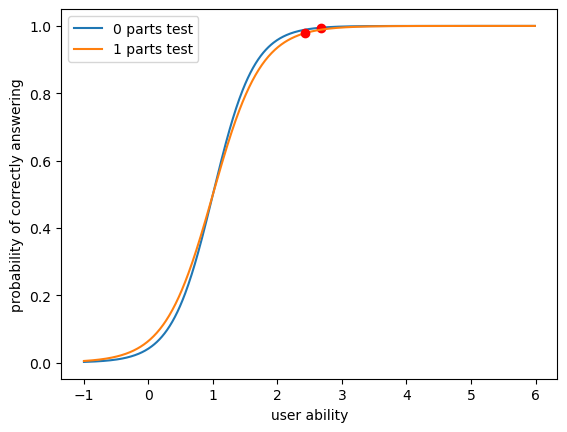

In [9]:
# Plot the ICC curve and show some important interesection.
# Those intersection is not clear in plot, so the data frame record all intersection.
print(all_selected_diff)
print(all_whole_abilities)
all_selected_diff = all_selected_diff

if len(np.array(all_selected_diff).shape) == 2:
    diff=[]
    disc=[]
    for i in all_selected_diff:
        a = list(i)
        diff.append(a[1])
        disc.append(a[0])

if len(np.array(all_selected_diff).shape) == 1:
    diff = all_selected_diff
    disc = [1]*len(diff)
    
guess = [0]*len(diff)
# abilities = all_whole_abilities[0:-1]

intersection_df = plot_ICC(diff=diff, disc=disc, guess=guess, abilities=all_whole_abilities)

loc_start = 0
loc_end = 2
correct_rate_by_parts = []
while len(correct_rate_by_parts) != (len(correct_rate) / 2):
    correct_rate_by_parts.append(sum(correct_rate[loc_start:loc_end]) / 2)
    loc_start = loc_start + 2
    loc_end = loc_end + 2
    
intersection_df["Real Correcting Rate"] = correct_rate_by_parts

difference = []
for probs, real in zip(intersection_df["Probs Correcting Answering"], correct_rate_by_parts):
    difference.append(abs(probs-real))
ICC_evaluate_acc = sum(difference) / len(difference)
User_log_summary_data.append(ICC_evaluate_acc)
print(User_log_summary_data)

1.32


,final score,total score,user correct rate,user part ability,ability rate,user score rate
part.1,52.10,62.52,0.833333,2.679209,0.446535,0.446214
part.2,18.08,54.24,0.333333,2.420911,0.403485,0.601062


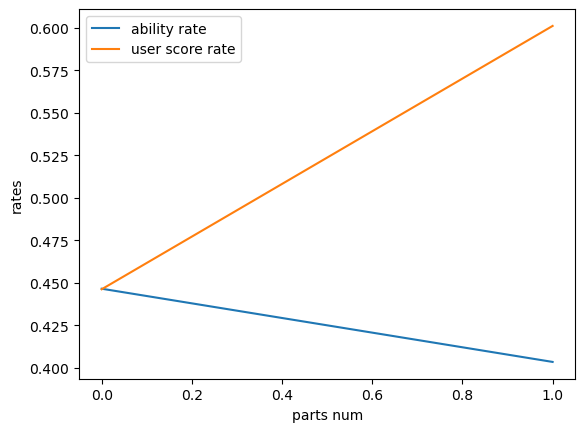

In [10]:
# This code part will show the ability change and the basic user's scores. 
# Through this way, to compare ability and the scores user's get, which can be used to evaluate the IRT's result.

question_score, material_score = getQuestionsScore(quesDiff)
print(material_score[10242])
final_score = 0
total_score = 0

part_final_score = 0
part_total_score = 0

parts_final_score = []
parts_total_score = []
parts_user_score = []
ability_rate = []

# all_whole_abilities_by_last_2_parts = all_whole_abilities[1:]


part_flag = 0
for ans, item in zip(correct_rate, all_selected_items):

    part_final_score = part_final_score + (material_score[item]*len(question_score[item])*ans)
#     final_score = final_score + material_score[item]
    
    part_total_score = part_total_score + (material_score[item]*len(question_score[item]))
    total_score = total_score + (material_score[item]*len(question_score[item]))
    
    part_flag += 1

    if part_flag == 2:
        parts_final_score.append(part_final_score)
        parts_total_score.append(part_total_score)
        parts_user_score.append(part_final_score / part_total_score)

        part_final_score = 0
        part_total_score = 0

        part_flag = 0    
    
# parts_final_score.append(final_score)
# parts_total_score.append(total_score)
# parts_user_score.append(final_score / total_score)

rowname = []
user_score_rate = []
for i, one_ability in enumerate(all_whole_abilities):
    name = "part."+ str(i+1)
    rowname.append(name)
    
    ability_rate.append((one_ability) / 6)
    user_score_rate.append(sum(parts_final_score[:i+1]) / total_score)
    
    
score_distribution = pd.DataFrame({"final score": parts_final_score,
                                   "total score": parts_total_score,
                                   "user correct rate":parts_user_score,
                                   "user part ability": all_whole_abilities,
                                   "ability rate": ability_rate,
                                   "user score rate": user_score_rate
                                  },index=rowname)

display(score_distribution)

Basic_score_evaluate = abs(ability_rate[-1] - user_score_rate[-1])
User_log_summary_data.append(Basic_score_evaluate)

x = range(len(all_whole_abilities))
y_score = user_score_rate
y_ability = ability_rate
plt.plot(x, y_ability, label='ability rate')
plt.plot(x, y_score, label='user score rate')
plt.xlabel('parts num')
plt.ylabel('rates')
plt.legend()

In [11]:
# Call the recommendation function
material_feature_path = "Data/Material Features For ML/Material_Features_For_ML.csv"
matDiffPath = "Data/Diffculty Level/Mateials_diffculty_by_cluster.csv"
Questions, Choices, TrueAnswers, OutputPath, top_n_questions_index, top_n_right, top_n_wrong = getRecommendationQuestions(material_feature_path=material_feature_path, 
                                                                         matDiffPath=matDiffPath, dataf=Data, 
                                                                         correct_rate=correct_rate, 
                                                                         all_selected_items=all_selected_items, 
                                                                         ability=all_whole_abilities[-1], 
                                                                         n_expectations=5, 
                                                                         recom_algo="Logistic_Regression")
User_log_summary_data.extend([top_n_right, top_n_wrong])

# app = ListeningComprehensionApp(manyQuestions=Questions, manyChoices=Choices, 
#                                 manyTrueAnswers=TrueAnswers, manyOutputPath=OutputPath, Recommendation=True, LastPart=False)
# app.mainloop()

12447it [00:00, 663495.78it/s]

12443
(12443, 3)
12443


,Unnamed: 0,Material Index,Materials Difficulty,Questions Numbers,Topics
0,0,0,0.01,1,4


2985
MoviePy - Writing audio in Data/Conversation mp3/index6179.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index10213.mp3


MoviePy - Done.


MoviePy - Writing audio in Data/Conversation mp3/index8870.mp3


MoviePy - Done.


MoviePy - Writing audio in Data/Conversation mp3/index4330.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index3790.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index11897.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index316.mp3


MoviePy - Done.


In [12]:
item_sele = []
items_answers = []
for co, item_index in zip(correct_rate, all_selected_items):
    if co < 0.74:
        items_answers.append(0)
    else:
        items_answers.append(1)
#         item_sele.append(item_index)

get_similarity(selected_items_index=all_selected_items,
               selected_items_answers = items_answers,
               reocmmendation_items_index=top_n_questions_index, 
               material_features_path=material_feature_path)

Similarity_evaluate = "No Result Now"
User_log_summary_data.append(Similarity_evaluate)

[[2.16 3.   0.  ]
 [2.12 3.   0.  ]
 [2.36 3.   0.  ]
 [2.25 3.   3.  ]]


,Unnamed: 0,Material Index,Materials Difficulty,Questions Numbers,Topics,type,Answers,min_similarity,closest_index,max_similarity,farest_index
1995,1995,1995,2.16,3,0,test,1.0,-0.215967,8870,0.944995,11897
5527,5527,5527,2.12,3,0,test,0.0,-0.209839,8870,0.942068,11897
1219,1219,1219,2.36,3,0,test,0.0,-0.245222,8870,0.958049,11897
10216,10216,10216,2.25,3,3,test,0.0,0.250801,8870,0.999608,3790
6179,6179,6179,1.05,2,4,recommendation,NaN,0.483507,1219,0.923020,10216
10213,10213,10213,-0.90,1,4,recommendation,NaN,0.054381,1219,0.640210,10216
8870,8870,8870,-3.00,1,3,recommendation,NaN,-0.245222,1219,0.250801,10216
4330,4330,4330,3.44,4,4,recommendation,NaN,0.793259,5527,0.998275,10216
3790,3790,3790,2.10,3,3,recommendation,NaN,0.772354,1219,0.999608,10216
11897,11897,11897,1.42,1,0,recommendation,NaN,0.742752,10216,0.958049,1219


In [13]:
print(User_log_summary_data)

[3.1428571428571432, 4, 2.91, 2.4209113347340487, [1995], [5527, 1219, 10216], 0, 0, 0.4031595877206399, 0.1975767850811529, [11897, 316], array([ 8870,  4330,  6179,  3790, 10213], dtype=int64), 'No Result Now']


In [39]:
User_log_summary_keys = ["Initial Ability", "Number of Listening materials", "Average Difficulty", 
                         "Tested ability", "Correct Answers Indices", "Wrong Answer Indices", 
                         "Max Topics of Right", "Max Topics of Wrong", "ICC evaluate Acc", "Basic Score evaluate", 
                         "Recommendation by Correct Answer", "Recommendation by Wrong Answer", "Similarity evaluate"]
User_Log_Summary = pd.read_csv("Data/User_Log_Summary.csv")
User_Log_Summary2 = User_Log_Summary.append(pd.DataFrame(data=[User_log_summary_data], 
                                                         columns=User_log_summary_keys, index=[len(User_Log_Summary)]))
display(User_Log_Summary2)
User_Log_Summary2.to_csv("Data/User_Log_Summary.csv", index=False)

,Initial Ability,Number of Listening materials,Average Difficulty,Tested ability,Correct Answers Indices,Wrong Answer Indices,Max Topics of Right,Max Topics of Wrong,ICC evaluate Acc,Basic Score evaluate,Recommendation by Correct Answer,Recommendation by Wrong Answer,Similarity evaluate
0,3.142857,4,2.91,2.420911,[1995],"[5527, 1219, 10216]",0,0,0.40316,0.197577,"[11897, 316]",[ 8870 4330 6179 3790 10213],No Result Now
1,3.142857,4,2.91,2.420911,[1995],"[5527, 1219, 10216]",0,0,0.40316,0.197577,"[11897, 316]","[8870, 4330, 6179, 3790, 10213]",No Result Now
